<h2>Imports</h2>

In [10]:
from utils import read_results_csv, extract_analysis_parameters, show_exploratory_data, qc_filter_dataset, plot_technical_replicates
import pandas as pd
import plotly.express as px

<h2>Data analysis input</h2>

In [11]:
# Define the dataset results that you want to analyze below ("microglia" or "astrocyte")
dataset = "astrocyte"

# Define the .csv results you want to explore and quality check
csv_path = "./results/astrocyte_results_cellpdia30_sigma1_dilrad4_dnad_obj_seg_v3_gliaero6_gliathr30_dnadero2.csv"

# Read both results and mouse_id .csv files and load them into a Dataframe 
df, df_mouse_id, merged_df = read_results_csv(dataset, csv_path)

# Print the analysis settings and extract them into variables
cellpose_nuclei_diameter, gaussian_sigma, dilation_radius_nuclei, dna_damage_segmenter_version, glia_nuclei_colocalization_erosion, glia_channel_threshold, glia_segmenter, glia_segmenter_version, dna_damage_erosion, parameters_title = extract_analysis_parameters(csv_path)

# Display the first few rows of the DataFrame
merged_df.head()


The following dataset will be analyzed: astrocyte
Cellpose nuclei diameter: 30
Gaussian sigma: 1
Dilation radius nuclei: 4
Dna damage segmenter version: 3
Glia erosion: 6
Glia threshold: 30
Glia semantic segmentation version: None
DNA damage foci erosion: 2


,index,filename,avg_dna_damage_foci/glia_+,avg_dna_damage_foci/glia_+_damage_+,avg_dna_damage_foci/all_nuclei,avg_dna_damage_foci/all_nuclei_damage_+,nr_+_dna_damage_glia_nuclei,nr_+_dna_damage_all_nuclei,nr_-_dna_damage_glia_nuclei,nr_glia_+_nuclei,...,%_glia+_signal,damage_load_ratio_glia_+_cells,damage_load_ratio_all_cells,tissue_location,staining_id,animal_id,sex,genotype,dna_damage_stain_quality_manual,manual_qc
0,0,DSB GFAP 101_40X_CA1,0.187500,1.0,0.475309,1.149254,3,67,13,16,...,3.414726,0.187500,0.413580,CA1,101,2119,female,APP/PS1,good,passed
1,1,DSB GFAP 101_40X_CA3,0.000000,NaN,1.151724,1.670000,0,100,7,7,...,4.178619,0.000000,0.689655,CA3,101,2119,female,APP/PS1,good,passed
2,2,DSB GFAP 101_40X_CTX1,0.187500,1.0,0.352201,1.037037,3,54,13,16,...,5.212784,0.187500,0.339623,CTX1,101,2119,female,APP/PS1,good,passed
3,3,DSB GFAP 101_40X_CTX2,0.388889,1.0,0.629344,1.189781,7,137,11,18,...,6.575394,0.388889,0.528958,CTX2,101,2119,female,APP/PS1,good,passed
4,4,DSB GFAP 101_40X_CTX3,0.444444,1.0,0.807229,1.410526,4,95,5,9,...,5.749798,0.444444,0.572289,CTX3,101,2119,female,APP/PS1,good,passed


<h2>Initial data exploration</h2>

In [12]:
show_exploratory_data(df, dataset, parameters_title)

<h2>Data filtration and quality control (QC)</h2>

We can observe there is a number of outliers in the glial and dna damage mask detections given the staining is suboptimal in some of the samples. I will filter the data to remove those suboptimal stains and just plot the optimal ones where the automated image analysis offers reliable results. The images passing and not passing quality control can be individually checked in the next two Juypter notebooks.

In [13]:
# Quality check the analyzed stainings based on deviations from the mean of both %_glia_signal and %_dna_damage_signal
merged_df = qc_filter_dataset(merged_df,
                              dataset, 
                              cellpose_nuclei_diameter, 
                              gaussian_sigma, 
                              dilation_radius_nuclei, 
                              dna_damage_segmenter_version, 
                              glia_nuclei_colocalization_erosion, 
                              glia_channel_threshold, 
                              glia_segmenter, 
                              glia_segmenter_version, 
                              dna_damage_erosion)

# Dataframe now displays the QC values
merged_df.head()

Glia_mask_area_%_mean: 3.0311070639511635, Dna_damage_mask_area_%_mean: 0.6495763515603954


,index,filename,avg_dna_damage_foci/glia_+,avg_dna_damage_foci/glia_+_damage_+,avg_dna_damage_foci/all_nuclei,avg_dna_damage_foci/all_nuclei_damage_+,nr_+_dna_damage_glia_nuclei,nr_+_dna_damage_all_nuclei,nr_-_dna_damage_glia_nuclei,nr_glia_+_nuclei,...,tissue_location,staining_id,animal_id,sex,genotype,dna_damage_stain_quality_manual,manual_qc,glia_stain_quality_auto,dna_damage_stain_quality_auto,staining_qc_passed
0,0,DSB GFAP 101_40X_CA1,0.187500,1.0,0.475309,1.149254,3,67,13,16,...,CA1,101,2119,female,APP/PS1,good,passed,optimal,optimal,True
1,1,DSB GFAP 101_40X_CA3,0.000000,NaN,1.151724,1.670000,0,100,7,7,...,CA3,101,2119,female,APP/PS1,good,passed,optimal,optimal,True
2,2,DSB GFAP 101_40X_CTX1,0.187500,1.0,0.352201,1.037037,3,54,13,16,...,CTX1,101,2119,female,APP/PS1,good,passed,optimal,optimal,True
3,3,DSB GFAP 101_40X_CTX2,0.388889,1.0,0.629344,1.189781,7,137,11,18,...,CTX2,101,2119,female,APP/PS1,good,passed,optimal,optimal,True
4,4,DSB GFAP 101_40X_CTX3,0.444444,1.0,0.807229,1.410526,4,95,5,9,...,CTX3,101,2119,female,APP/PS1,good,passed,optimal,optimal,True


<h2>Plot technical replicates</h2>

First we will plot technical replicates without averaging them into biological replicas

In [14]:
# Remove data from images with a poor quality stain (auto QC), copy to avoid warnings
auto_filtered_df = merged_df[merged_df['staining_qc_passed'] == True].copy()

# Create a new column for combined sex and tissue location
auto_filtered_df['sex_tissue'] = auto_filtered_df['sex'] + ' - ' + auto_filtered_df['tissue_location']

# Define the order of the categories to ensure that male and female for each tissue location are side by side
categories = [
    'male - CA1', 'female - CA1',
    'male - CA3', 'female - CA3',
    'male - CTX1', 'female - CTX1',
    'male - CTX2', 'female - CTX2',
    'male - CTX3', 'female - CTX3',
    'male - DG', 'female - DG'
]

In [15]:
plot_technical_replicates(auto_filtered_df, categories, dataset, parameters_title)

<h2>Aggregate tissue location results and plot biological replicates</h2>

In [24]:
# Define aggregation rules for each column
aggregations = {
    'nr_+_dna_damage_glia_nuclei': 'sum',
    'nr_+_dna_damage_all_nuclei': 'sum',
    'nr_glia_+_nuclei': 'sum',
    'nr_total_nuclei': 'sum',
    'sex': 'first',  # 'sex' does not vary within each animal_id
    'genotype': 'first'  # 'genotype' does not vary within each animal_id
}

# Group by 'animal_id' and apply the defined aggregation rules
grouped = auto_filtered_df.groupby('animal_id').agg(aggregations)

# Reset index to make 'animal_id' a column
result_df = grouped.reset_index()

# Calculate damage_load_ratio_glia_+
result_df['damage_load_ratio_glia_+'] = result_df['nr_+_dna_damage_glia_nuclei'] / result_df['nr_glia_+_nuclei']

# Calculate damage_load_ratio_total
result_df['damage_load_ratio_total'] = result_df['nr_+_dna_damage_all_nuclei'] / result_df['nr_total_nuclei']

# Manually drop animal_id 147 (staining not working in the astrocyte dataset)
value = 147
column_name = "animal_id"

try:
    # Check if the column exists in the DataFrame
    if column_name in result_df.columns:
        # Drop the rows where the column has the specified value
        result_df = result_df[result_df[column_name] != value]
        print(f"Rows containing the value {value} under '{column_name}' have been dropped.")
    else:
        print(f"The column '{column_name}' does not exist in the DataFrame.")
        
except Exception as e:
    print(f"An error occurred: {e}")

# Display the new DataFrame
result_df

Rows containing the value 147 under 'animal_id' have been dropped.


,animal_id,nr_+_dna_damage_glia_nuclei,nr_+_dna_damage_all_nuclei,nr_glia_+_nuclei,nr_total_nuclei,sex,genotype,damage_load_ratio_glia_+,damage_load_ratio_total
1,231,12,539,62,1347,male,APP/PS1 x Neil3 KO,0.193548,0.400148
2,253,30,815,117,1599,female,APP/PS1 x Neil3 KO,0.256410,0.509694
3,305,22,365,48,1007,male,APP/PS1 x Neil3 KO,0.458333,0.362463
4,885,52,1689,105,2902,male,APP/PS1,0.495238,0.582012
5,887,16,1577,68,3160,male,APP/PS1,0.235294,0.499051
6,892,17,1163,46,2268,female,APP/PS1,0.369565,0.512787
7,1887,53,1506,138,2593,male,APP/PS1 x Neil3 KO,0.384058,0.580794
8,1891,72,1591,126,2396,female,APP/PS1 x Neil3 KO,0.571429,0.664023
9,1989,22,992,50,1873,female,APP/PS1,0.440000,0.529632
10,1995,27,1236,99,2227,female,APP/PS1 x Neil3 KO,0.272727,0.555007


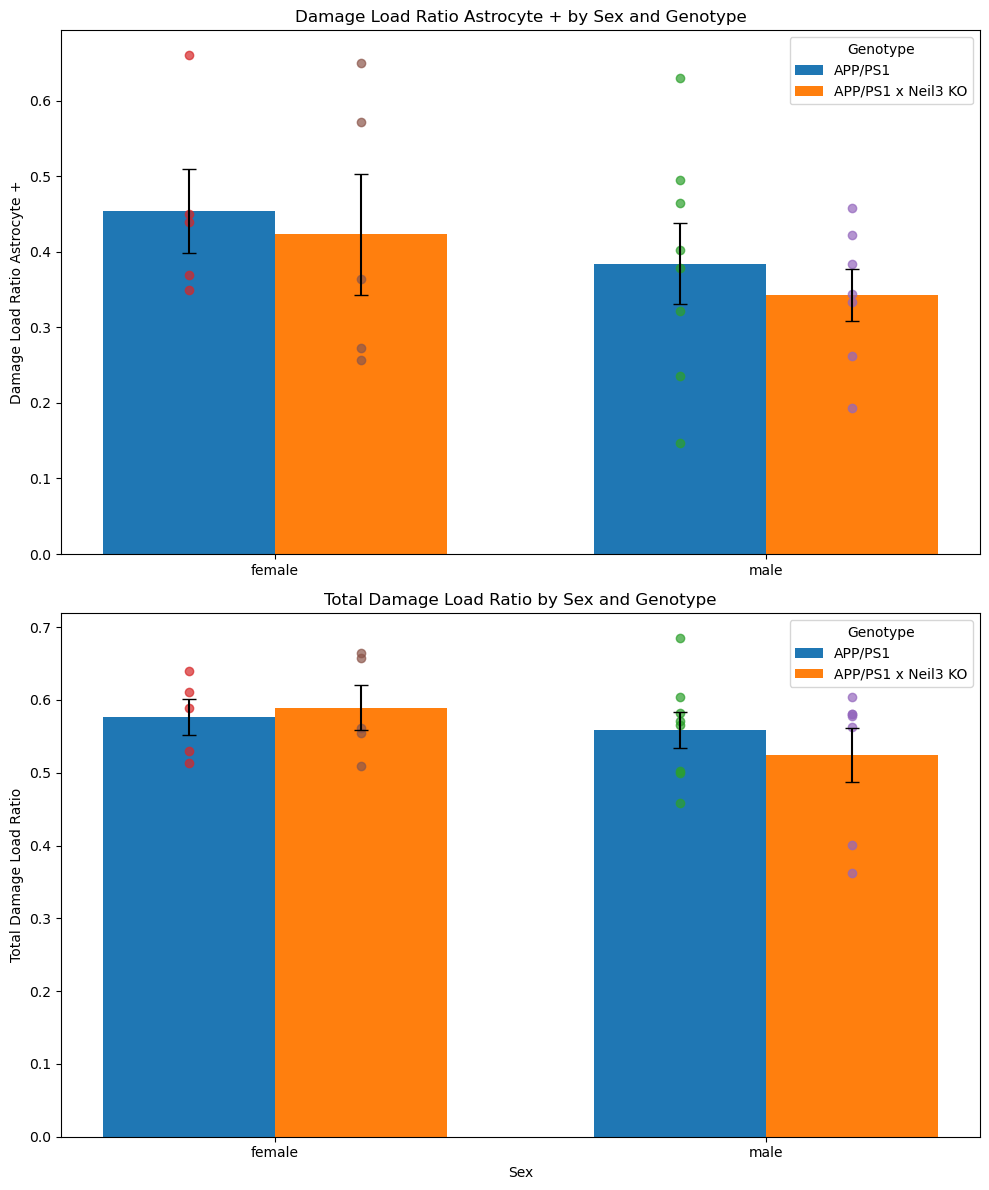

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Calculate means and standard errors of the mean for each group
grouped = result_df.groupby(['sex', 'genotype']).agg({
    'damage_load_ratio_glia_+': ['mean', 'sem'],
    'damage_load_ratio_total': ['mean', 'sem']
}).reset_index()

# Simplify multi-level column names resulting from aggregation
grouped.columns = [' '.join(col).strip() for col in grouped.columns.values]

# Pivoting the table for easier plotting, for both metrics
pivot_glia = grouped.pivot(index='sex', columns='genotype', values='damage_load_ratio_glia_+ mean')
errors_glia = grouped.pivot(index='sex', columns='genotype', values='damage_load_ratio_glia_+ sem')

pivot_total = grouped.pivot(index='sex', columns='genotype', values='damage_load_ratio_total mean')
errors_total = grouped.pivot(index='sex', columns='genotype', values='damage_load_ratio_total sem')

# Define bar width and positions
bar_width = 0.35
index = np.arange(len(pivot_glia))

# Setting figure and axes for subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))  # Create 2 subplots vertically

# Plotting the bars for damage_load_ratio_glia_+
for i, genotype in enumerate(grouped['genotype'].unique()):
    ax1.bar(index + i * bar_width, pivot_glia[genotype], yerr=errors_glia[genotype], 
            width=bar_width, label=genotype, capsize=5)

# Plotting the bars for damage_load_ratio_total
for i, genotype in enumerate(grouped['genotype'].unique()):
    ax2.bar(index + i * bar_width, pivot_total[genotype], yerr=errors_total[genotype], 
            width=bar_width, label=genotype, capsize=5)

# Adding individual points for damage_load_ratio_glia_+
for i, genotype in enumerate(grouped['genotype'].unique()):
    for sex in result_df['sex'].unique():
        subset = result_df[(result_df['genotype'] == genotype) & (result_df['sex'] == sex)]
        x = np.full_like(subset['damage_load_ratio_glia_+'], index[list(pivot_glia.index).index(sex)] + i * bar_width)
        ax1.scatter(x, subset['damage_load_ratio_glia_+'], alpha=0.7)

# Adding individual points for damage_load_ratio_total
for i, genotype in enumerate(grouped['genotype'].unique()):
    for sex in result_df['sex'].unique():
        subset = result_df[(result_df['genotype'] == genotype) & (result_df['sex'] == sex)]
        x = np.full_like(subset['damage_load_ratio_total'], index[list(pivot_total.index).index(sex)] + i * bar_width)
        ax2.scatter(x, subset['damage_load_ratio_total'], alpha=0.7)

# Setting labels and titles
ax1.set_ylabel(f'Damage Load Ratio {dataset.capitalize()} +')
ax1.set_title(f'Damage Load Ratio {dataset.capitalize()} + by Sex and Genotype')
ax1.set_xticks(index + bar_width / 2)
ax1.set_xticklabels(pivot_glia.index)
ax1.legend(title="Genotype")

ax2.set_xlabel('Sex')
ax2.set_ylabel('Total Damage Load Ratio')
ax2.set_title('Total Damage Load Ratio by Sex and Genotype')
ax2.set_xticks(index + bar_width / 2)
ax2.set_xticklabels(pivot_total.index)
ax2.legend(title="Genotype")

# Show plot
plt.tight_layout()
plt.show()


<h2>Explore failed QC Dataframe</h2>

In [18]:
qc_failed_df = merged_df[merged_df['staining_qc_passed'] == False]

print(f"{qc_failed_df.shape[0]} stains have not passed QC and have been discarded")

qc_failed_df


12 stains have not passed QC and have been discarded


,index,filename,avg_dna_damage_foci/glia_+,avg_dna_damage_foci/glia_+_damage_+,avg_dna_damage_foci/all_nuclei,avg_dna_damage_foci/all_nuclei_damage_+,nr_+_dna_damage_glia_nuclei,nr_+_dna_damage_all_nuclei,nr_-_dna_damage_glia_nuclei,nr_glia_+_nuclei,...,tissue_location,staining_id,animal_id,sex,genotype,dna_damage_stain_quality_manual,manual_qc,glia_stain_quality_auto,dna_damage_stain_quality_auto,staining_qc_passed
121,121,DSB GFAP 25_40X_CA1,1.000000,1.500000,1.136000,1.510638,2,94,1,3,...,CA1,25,1996,female,APP/PS1 x Neil3 KO,good,passed,optimal,optimal,False
122,122,DSB GFAP 25_40X_CA3,1.500000,1.500000,1.201117,1.666667,2,129,0,2,...,CA3,25,1996,female,APP/PS1 x Neil3 KO,good,passed,optimal,optimal,False
123,123,DSB GFAP 25_40X_CTX1,1.000000,1.500000,0.762431,1.408163,2,98,1,3,...,CTX1,25,1996,female,APP/PS1 x Neil3 KO,good,passed,optimal,optimal,False
124,124,DSB GFAP 25_40X_CTX2,0.000000,NaN,0.760870,1.359223,0,103,1,1,...,CTX2,25,1996,female,APP/PS1 x Neil3 KO,good,passed,optimal,optimal,False
125,125,DSB GFAP 25_40X_CTX3,0.750000,1.200000,0.748201,1.368421,10,76,6,16,...,CTX3,25,1996,female,APP/PS1 x Neil3 KO,good,passed,optimal,optimal,False
126,126,DSB GFAP 25_40X_DG,1.000000,2.000000,1.838554,2.040107,2,374,2,4,...,DG,25,1996,female,APP/PS1 x Neil3 KO,good,passed,optimal,suboptimal,False
213,213,DSB GFAP 6_40X_CA1,0.444444,1.200000,0.759358,1.245614,10,114,17,27,...,CA1,6,2042,male,APP/PS1,good,passed,optimal,optimal,False
214,214,DSB GFAP 6_40X_CA3,0.545455,1.000000,0.819672,1.449275,6,69,5,11,...,CA3,6,2042,male,APP/PS1,good,passed,optimal,optimal,False
215,215,DSB GFAP 6_40X_CTX1,0.523810,1.571429,0.689655,1.212121,7,132,14,21,...,CTX1,6,2042,male,APP/PS1,good,passed,optimal,optimal,False
216,216,DSB GFAP 6_40X_CTX2,0.375000,1.500000,0.694581,1.330189,2,106,6,8,...,CTX2,6,2042,male,APP/PS1,good,passed,optimal,optimal,False
